# Tutorial 02: Change N(z) and N_eff

Author: Tianqing Zhang

One pretty useful thing for the Fisher forecast is if we can do customized n(z) for the lens and sources, or change the n_eff of the lens and source bins, by changing the covairance matrix of the corresponding tomographic bin pairs.

Let's do that in this tutorial

In [1]:
from fisherA2Z.fisher import Fisher

import pyccl as ccl
import matplotlib.pyplot as plt
import warnings
from fisherA2Z.fisher import Fisher, marginalize, SmailZ, Core, PhotozModel,plot_contours 
import glob
import numpy as np
warnings.filterwarnings('ignore')

### Here we use the customized n(z) from Hang2024+

In [2]:
nz_source_list = [f'./tutorial_03_data/NofZ-source-tomo-{i}-fzb.dat' for i in range(5)]
nz_source_list

['./tutorial_03_data/NofZ-source-tomo-0-fzb.dat',
 './tutorial_03_data/NofZ-source-tomo-1-fzb.dat',
 './tutorial_03_data/NofZ-source-tomo-2-fzb.dat',
 './tutorial_03_data/NofZ-source-tomo-3-fzb.dat',
 './tutorial_03_data/NofZ-source-tomo-4-fzb.dat']

In [3]:
cosmo = ccl.Cosmology(Omega_c=0.2666, 
                       Omega_b=0.049, 
                       h=0.6727, 
                       sigma8=0.831, 
                       n_s=0.9645, 
                       transfer_function='eisenstein_hu')


In [6]:
# f_ss_y10 = Fisher(cosmo, probe='ss', save_deriv='data/obj_deriv_ss_y10.pkl', 
#                   overwrite=True, customize_source_nz=nz_source_list, end = 16, 
#                  step = 0.001)
# f_ss_y10._makeSourcePZ()
# f_ss_y10._makeLensPZ()
# f_ss_y10.getElls()
# f_ss_y10.makeFidCells()
# f_ss_y10.buildCovMatrix()


In [4]:
# f_ss_y10.getDerivs(param = 'zvariance1')

In [13]:
f_ss_y10 = Fisher(cosmo, probe='ss', save_deriv='data/obj_deriv_ss_y10_customize_nz.pkl', 
                  overwrite=False, customize_source_nz=nz_source_list)
f_ss_y10.process()


Making source pz
Making lens pz
Making fiducial c_ells
Getting covariance matrix
Building fisher matrix
Done


In [ ]:
f_3x2_y10 = Fisher(cosmo, probe='3x2pt', save_deriv='data/obj_deriv_3x2pt_y10_customize_nz.pkl', 
                  overwrite=False, customize_source_nz=nz_source_list)
f_3x2_y10.process()

Making source pz


In [11]:
param_order = f_ss_y10.param_order
param_labels =f_ss_y10.param_labels.copy()
for i in range(5):
    param_labels[11+i] = '$\delta z_{}$'.format(i+1)
    param_labels[16+i] = '$\sigma_{}$'.format(i+1)

In [16]:
def plot_2_contour(Fisher, fisher_matrix1, fisher_matrix2, start = 0, finish = 36 , filename = None ):

    end = finish - start
    
    bias_ell = Fisher.ell
    vals = Fisher.vals
    fisher = [fisher_matrix1, fisher_matrix2]
    cov = [np.linalg.inv(fisher_matrix1),np.linalg.inv(fisher_matrix2) ]
    
    tab10 = plt.cm.get_cmap('tab10')
    colors = [tab10(i) for i in range(tab10.N)]    
    linestyles = ['--', '-']
    # colors = [colors[0], colors[1]]

    xlim_range = [[0.3,0.4],[-2.5,-0.75]]
    ylim_range = [[0.6,0.85],[-1,4.0]]
    plt.rc('axes', titlesize=14)     # fontsize of the axes title
    plt.rc('axes', labelsize=14)    # fontsize of the x and y labels


    fig = plt.figure(figsize = (15,15))
    fig.subplots_adjust(left=0.1, bottom=0.1, right=1.00, top=1.00, wspace=0.0, hspace=0.0)

    
    for row in range(start,finish):
        for col in range(row+1,finish):
            params = [param_order[row], param_order[col]]

            labels = ['Cosmic Shear', '3x2pt']
            fid = (vals[params[0]], vals[params[1]])
            es = []
            index1 = param_order.index(params[0])
            index2 = param_order.index(params[1])

            my_xlim = [fid[0] - 3.5*np.sqrt(cov[0][index1-start][index1-start]) , fid[0] + 3.5*np.sqrt(cov[0][index1-start][index1-start])]
            my_ylim = [fid[1] - 3.5*np.sqrt(cov[0][index2-start][index2-start]) , fid[1] + 3.5*np.sqrt(cov[0][index2-start][index2-start])]


            for i, matrix in enumerate(fisher):

                e, xlim, ylim, _ = plot_contours(marginalize(matrix, row-start, col-start),
                                  sigmas=1,
                                  fid=fid)
                e.set_facecolor('none')
                e.set_edgecolor(colors[i])
                e.set_label(labels[i])
                e.set_alpha(0.9)
                e.set_linewidth(2)
                e.set_linestyle(linestyles[i])
                es.append(e)
                
                e, xlim, ylim, _ = plot_contours(marginalize(matrix, row-start, col-start),
                                  sigmas=2,
                                  fid=fid)
                e.set_facecolor('none')
                e.set_edgecolor(colors[i])
                e.set_label(labels[i])
                e.set_alpha(0.9)
                e.set_linewidth(2)
                e.set_linestyle(linestyles[i])

                es.append(e)
                
#                 print(params,marginalize(matrix, row, col) )
            ax = plt.subplot(end,end,end*(col-start)+row-start+1)
            subplot_number = end*(col-start)+row+1-start
# #             print(es)
            
            for i, e in enumerate(es):
                ax.add_artist(e)

            ax.tick_params(
                axis='x',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                bottom=True,      # ticks along the bottom edge are off
                top=True,         # ticks along the top edge are off
                labelbottom=False)

            ax.tick_params(
                axis='y',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                left=True,      # ticks along the bottom edge are off
                right=True,         # ticks along the top edge are off
                labelleft=False)

            if subplot_number in list(range(end**2-end,end**2)):
                plt.xlabel(param_labels[param_order.index(params[0])], fontsize = 18)
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    direction = 'in',
                    which='both',      # both major and minor ticks are affected
                    bottom=True,      # ticks along the bottom edge are off
                    top=True,         # ticks along the top edge are off
                    labelbottom=True,rotation=45, labelsize = 14)
            if (subplot_number-1)%end==0:
                plt.ylabel(param_labels[param_order.index(params[1])], fontsize = 18)
                #plt.ticklabel_format(axis='y',style='scientific',scilimits=(0,3))
                ax.tick_params(
                    axis='y',          # changes apply to the x-axis
                    direction = 'in',
                    which='both',      # both major and minor ticks are affected
                    left=True,      # ticks along the bottom edge are off
                    right=True,         # ticks along the top edge are off
                    labelleft=True, labelsize = 14)
            #plt.title(str(subplot_number))
            #plt.xlim([-1.1, -0.9])
            plt.xlim(my_xlim)
            plt.ylim(my_ylim)
            
    plt.subplot(end,end,2*end-2)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.axis('off')
    for i in range(len(labels)):
        ax.plot([0],[0], linestyles[i], linewidth = 1.0 , color = colors[i], alpha = 0.8,  label = labels[i] )

    ax.legend(fontsize = 18)
    
    if filename != None:
        plt.savefig(filename)


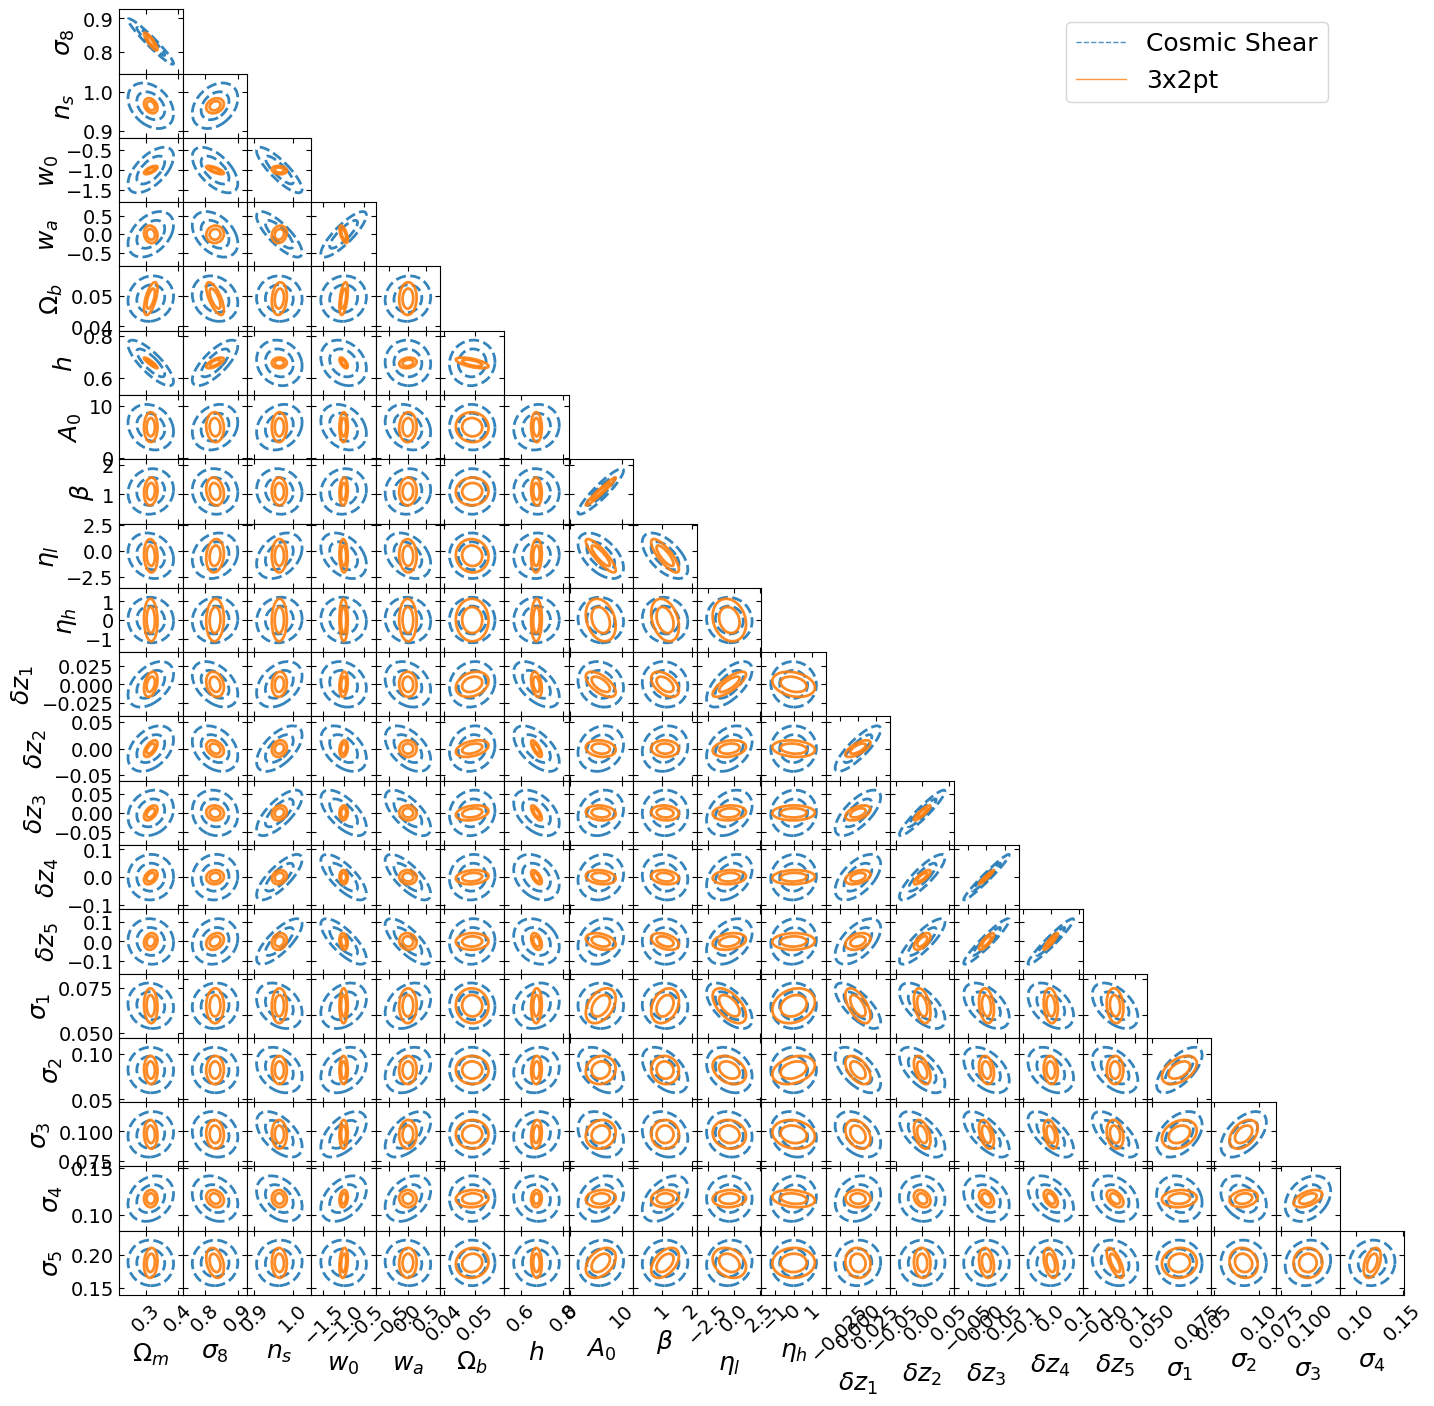

In [17]:
plot_2_contour(f_ss_y10, f_ss_y10.fisher, f_3x2_y10.fisher, finish = 21)
